In [3]:
import scipy.io as sci
import numpy as np
import glob
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import pylab
#import statsmodels.api as sm

## Data Format
The matlab data is formatted so that flash responses and beep responses are stored in separate matrices called accMatF for flash and accMatB for beep. The flash and beep combinations corresponding to the responses are also stored in separate matrices called mixtrF for flash and mixtrB for beep. We will separate the data based on the type of response the participant gave, and from there we can subset by congruent or unisensory.

In [4]:
datapath = 'ExpData/*.mat'
datafiles = np.array(glob.glob(datapath))

In [5]:
flashdata = np.empty((1,5))
beepdata = np.empty((1,5))
for i in np.arange(0, len(datafiles)):
    mat = sci.loadmat(datafiles[i])
    matf = np.insert(mat['mixtrF'], 0, int(i + 1), axis=1)
    accf = np.hstack((matf, mat['accMatF'], mat['resptimeF']))
    matb = np.insert(mat['mixtrB'], 0, int(i + 1), axis=1)
    accb = np.hstack((matb, mat['accMatB'], mat['resptimeB']))
    flashdata = np.vstack((flashdata, accf))
    beepdata = np.vstack((beepdata, accb))
    
flashdata = flashdata[1:]
beepdata = beepdata[1:]

### We will store the data in Pandas dataframes to make subsetting and extracting columns/rows easier:
Column 1: Subject ID <br>
Column 2: Number of flashes presented <br>
Column 3: Number of beeps presented <br>
Column 4: Accuracy of response <br>
Column 5: Response time 

In [6]:
flashframe = pd.DataFrame(flashdata, columns=['Subj_id', 'flashpres', 'beeppres', 'acc', 'rt'])
beepframe = pd.DataFrame(beepdata, columns=['Subj_id', 'flashpres', 'beeppres', 'acc', 'rt'])

In [7]:
congrf = flashframe.loc[flashframe['flashpres'] == flashframe['beeppres']]
unif = flashframe.loc[flashframe['beeppres'] == 0]
congrb = beepframe.loc[beepframe['flashpres'] == beepframe['beeppres']]
unib = beepframe.loc[beepframe['flashpres'] == 0]

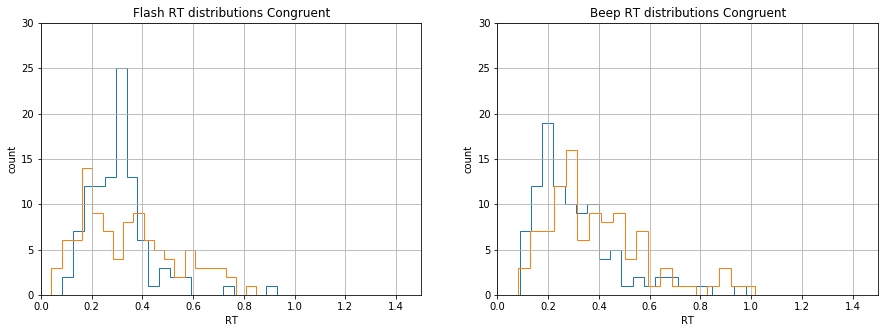

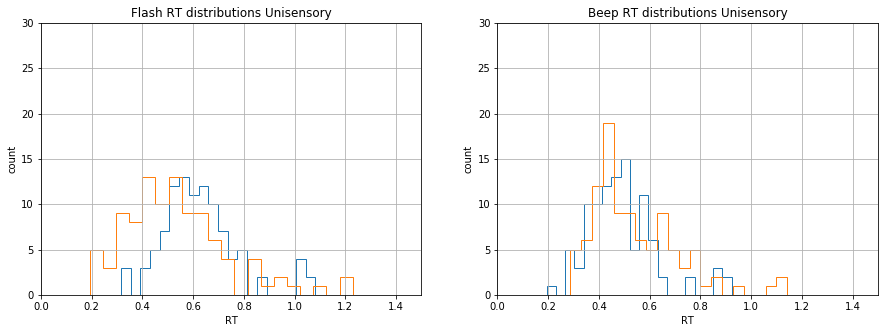

In [8]:
congrfig = plt.figure(figsize=(15, 5))
ax = congrfig.add_subplot(121, xlabel='RT', ylabel='count', title='Flash RT distributions Congruent')
ax.set_xlim([0, 1.5])
ax.set_ylim([0, 30])
for i, subj_data in congrf.groupby('Subj_id'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

ax = congrfig.add_subplot(122, xlabel='RT', ylabel='count', title='Beep RT distributions Congruent')
ax.set_xlim([0, 1.5])
ax.set_ylim([0, 30])
for i, subj_data in congrb.groupby('Subj_id'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
    
unifig = plt.figure(figsize=(15, 5))
ax = unifig.add_subplot(121, xlabel='RT', ylabel='count', title='Flash RT distributions Unisensory')
ax.set_xlim([0, 1.5])
ax.set_ylim([0, 30])
for i, subj_data in unif.groupby('Subj_id'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

ax = unifig.add_subplot(122, xlabel='RT', ylabel='count', title='Beep RT distributions Unisensory')
ax.set_xlim([0, 1.5])
ax.set_ylim([0, 30])
for i, subj_data in unib.groupby('Subj_id'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

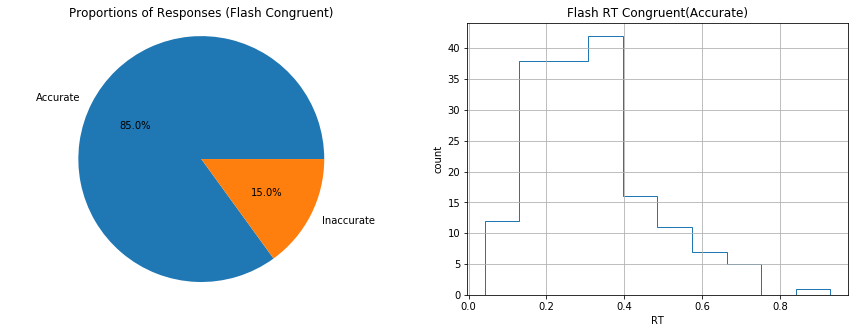

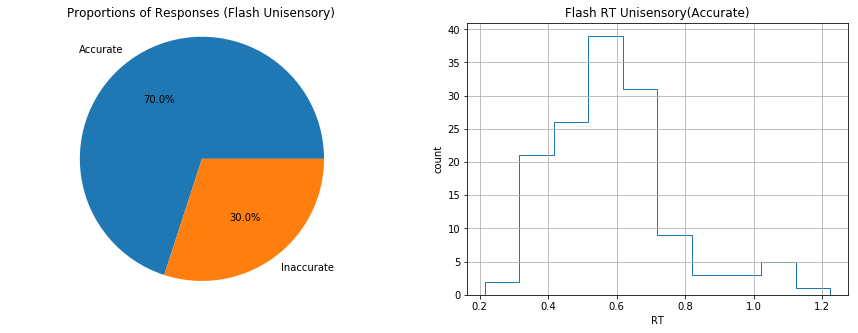

In [9]:
sizes = [congrf['acc'].value_counts()[1], congrf['acc'].value_counts()[0]]
labels = ['Accurate', 'Inaccurate']

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(121, title='Proportions of Responses (Flash Congruent)')
ax.pie(sizes, labels = labels, autopct='%1.1f%%')
ax.axis('equal')

ax = fig.add_subplot(122, xlabel='RT', ylabel='count', title='Flash RT Congruent(Accurate)')
#for i, subj_data in congf.groupby('response'):
#    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
congrf.loc[congrf['acc'] == 1].rt.hist(histtype='step', ax = ax)


#print(unifdata['response'].value_counts())
sizes = [unif['acc'].value_counts()[1], unif['acc'].value_counts()[0]]
labels = ['Accurate', 'Inaccurate']

fig3 = plt.figure(figsize=(15, 5))
ax = fig3.add_subplot(121, title='Proportions of Responses (Flash Unisensory)')
ax.pie(sizes, labels = labels, autopct='%1.1f%%')
ax.axis('equal')

ax = fig3.add_subplot(122, xlabel='RT', ylabel='count', title='Flash RT Unisensory(Accurate)')
#for i, subj_data in unif.groupby('response'):
#    subj_data.rt.hist(bins=20, histtype='step', edgecolor="green", ax=ax)
unif.loc[unif['acc'] == 1].rt.hist(histtype='step', ax = ax)

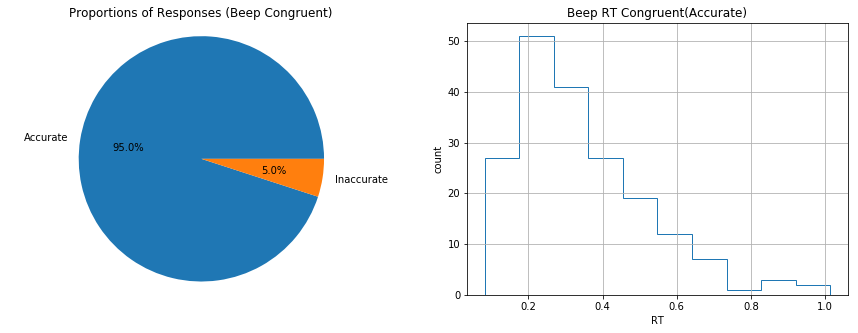

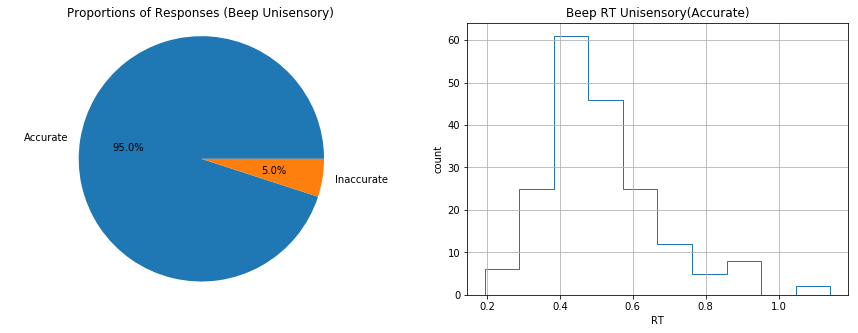

In [10]:
sizes = [congrb['acc'].value_counts()[1], congrb['acc'].value_counts()[0]]
labels = ['Accurate', 'Inaccurate']

fig5 = plt.figure(figsize=(15, 5))
ax = fig5.add_subplot(121, title='Proportions of Responses (Beep Congruent)')
ax.pie(sizes, labels = labels, autopct='%1.1f%%')
ax.axis('equal')

ax = fig5.add_subplot(122, xlabel='RT', ylabel='count', title='Beep RT Congruent(Accurate)')
#for i, subj_data in congb.groupby('response'):
#    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
congrb.loc[congrb['acc'] == 1].rt.hist(histtype='step', ax = ax)    
    
#print(unibdata['response'].value_counts())
sizes = [unib['acc'].value_counts()[1], unib['acc'].value_counts()[0]]
labels = ['Accurate', 'Inaccurate']

fig7 = plt.figure(figsize=(15, 5))
ax = fig7.add_subplot(121, title='Proportions of Responses (Beep Unisensory)')
ax.pie(sizes, labels = labels, autopct='%1.1f%%')
ax.axis('equal')

ax = fig7.add_subplot(122, xlabel='RT', ylabel='count', title='Beep RT Unisensory(Accurate)')
#for i, subj_data in unib.groupby('response'):
#    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
unib.loc[unib['acc'] == 1].rt.hist(histtype='step', ax = ax)

In [11]:
### Calculate standard error for each condition(flash response)
def calcstderr(data, col):
    num = float(0)
    count = 0
    for i, subj_data in data.groupby('Subj_id'):
        num += subj_data[col].std()
        count += 1
    return(num/count)

In [12]:
# if subject id is not given, plot the means including std
def plotbars(flashuni, beepuni, flashcongr, beepcongr, title1, title2, subjid = 0):
    if (subjid != 0):
        flashuni = flashuni.loc[flashuni['Subj_id'] == subjid]
        beepuni = beepuni.loc[beepuni['Subj_id'] == subjid]
        flashcongr = flashcongr.loc[flashcongr['Subj_id'] == subjid]
        beepcongr = beepcongr.loc[beepcongr['Subj_id'] == subjid]
        
    fig = plt.figure(figsize=(15,5)) 
    ## % correct plot
    flashuniacc = flashuni['acc'].mean()
    beepuniacc = beepuni['acc'].mean()
    flashcongracc = flashcongr['acc'].mean()
    beepcongracc = beepcongr['acc'].mean()
    allcongracc = (flashcongracc + beepcongracc) / 2
    
    ax = fig.add_subplot(121, xlabel='condition', ylabel='% accurate', title=title1)
    objects = ('Flash Uni', 'Beep Uni', 'Both Congr', 'Flash Congr', 'Beep Congr')
    y_pos = np.arange(len(objects))
    performance = [flashuniacc, beepuniacc, allcongracc, flashcongracc, beepcongracc]

    if(subjid == 0):
        flashuniaccerr = calcstderr(flashuni, 'acc')
        beepuniaccerr = calcstderr(beepuni, 'acc')
        flashcongraccerr = calcstderr(flashcongr, 'acc')
        beepcongraccerr = calcstderr(beepcongr, 'acc')
        allcongraccerr = (flashcongraccerr + beepcongraccerr) / 2
        plt.bar(y_pos, performance, yerr=[flashuniaccerr, beepuniaccerr, allcongraccerr, flashcongraccerr, beepcongraccerr], 
                color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'], ecolor='black', capsize=10)
    else:
        plt.bar(y_pos, performance, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'], ecolor='black', capsize=10)
        
    plt.xticks(y_pos, objects)
    plt.ylim([0,1])
    
    ## mean rt plot, only want accurate trials
    flashunirt = flashuni.loc[flashuni['acc'] == 1]['rt'].mean()
    beepunirt = beepuni.loc[beepuni['acc'] == 1]['rt'].mean()
    flashcongrrt = flashcongr.loc[flashcongr['acc'] == 1]['rt'].mean()
    beepcongrrt = beepcongr.loc[beepcongr['acc'] == 1]['rt'].mean()
    allcongrrt = (flashcongrrt + beepcongrrt) / 2
    
    ax = fig.add_subplot(122, xlabel='condition', ylabel='mean rt', title=title2)
    objects = ('Flash Uni', 'Beep Uni', 'Both Congr', 'Flash Congr', 'Beep Congr')
    y_pos = np.arange(len(objects))
    performance = [flashunirt, beepunirt, allcongrrt, flashcongrrt, beepcongrrt]

    if (subjid == 0):
        flashunirterr = calcstderr(flashuni, 'rt')
        beepunirterr = calcstderr(beepuni, 'rt')
        flashcongrrterr = calcstderr(flashcongr, 'rt')
        beepcongrrterr = calcstderr(beepcongr, 'rt')
        allcongrrterr = (flashcongrrterr + beepcongrrterr) / 2
        plt.bar(y_pos, performance, yerr=[flashunirterr, beepunirterr, allcongrrterr, flashcongrrterr, beepcongrrterr], 
                color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'], ecolor='black', capsize=10)
    else:
        plt.bar(y_pos, performance, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'], ecolor='black', capsize=10)
        
    plt.xticks(y_pos, objects)
    plt.ylim([0,1])

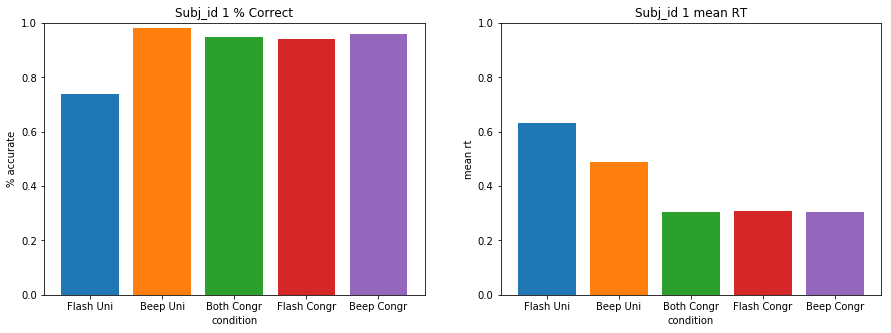

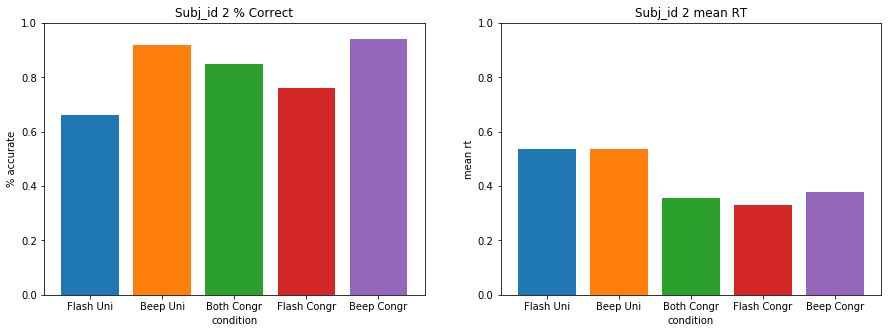

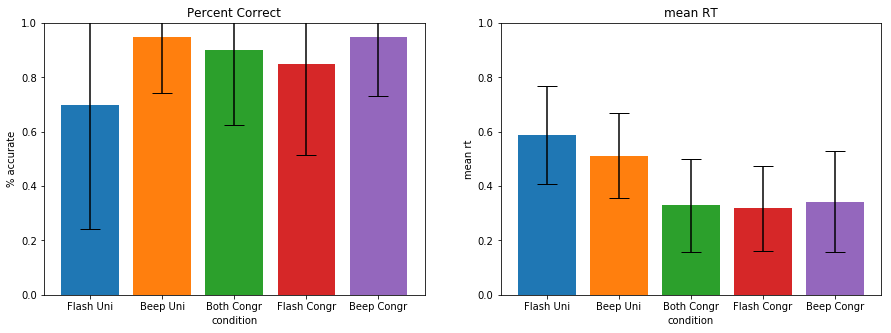

In [13]:
plotbars(unif, unib, congrf, congrb, "Subj_id 1 % Correct", "Subj_id 1 mean RT", 1)
plotbars(unif, unib, congrf, congrb, "Subj_id 2 % Correct", "Subj_id 2 mean RT", 2)
plotbars(unif, unib, congrf, congrb, "Percent Correct", "mean RT")

## Between Subjects Model

In [14]:
import hddm

C:\Users\Edwin\Anaconda3\lib\site-packages\IPython\parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [15]:
alldata = pd.concat([flashframe, beepframe])
alldata.columns = ['Subj_id', 'flashpres', 'beeppres', 'response', 'rt']
conditions = [(alldata['flashpres'] == 0) & (alldata['beeppres'] == 2), 
              (alldata['flashpres'] == 0) & (alldata['beeppres'] == 3),
              (alldata['flashpres'] == 2) & (alldata['beeppres'] == 0),
              (alldata['flashpres'] == 3) & (alldata['beeppres'] == 0),
              (alldata['flashpres'] == 2) & (alldata['beeppres'] == 2),
              (alldata['flashpres'] == 3) & (alldata['beeppres'] == 3),]
choices = ['A2', 'A3', 'V2', 'V3', 'A2V2', 'A3V3']
alldata['stimName'] = np.select(conditions, choices)
#alldata

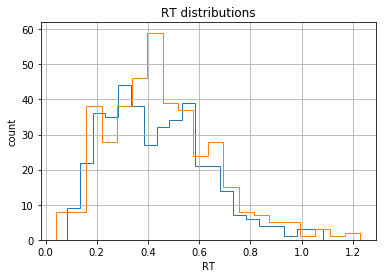

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in alldata.groupby('Subj_id'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

In [ ]:
model = hddm.HDDM(alldata)
model.find_starting_values()
model.sample(2000, burn=20)

In [ ]:
model.print_stats()
model.plot_posteriors(['a', 't', 'v', 'a_std'])

In [ ]:
model.plot_posterior_predictive(figsize=(14, 10))

We can model the data using prior information that congruency will usually mean higher drift rate

In [18]:
m_stim = hddm.HDDM(alldata, depends_on={'v': 'stimName'}, include=['a', 'v', 't', 'p_outlier'])
m_stim.find_starting_values()
m_stim.sample(10000, burn=1000)

-143.101357355
-143.101006895
 [-----------------100%-----------------] 10000 of 10000 complete in 139.5 sec

In [ ]:
models = list()
for i in range(5):
    m = hddm.HDDM(alldata)
    m.find_starting_values()
    m.sample(5000, burn=20)
    models.append(m)

In [ ]:
hddm.analyze.gelman_rubin(models)

                 mean         std         2.5q         25q         50q         75q      97.5q       mc err
a             1.64827   0.0407457       1.5708     1.61993     1.64774     1.67536    1.73037  0.000725958
v(A2)         1.43961    0.146681      1.15419     1.33862      1.4401      1.5374     1.7332   0.00144924
v(A2V2)       1.74858    0.126539      1.50061     1.66335     1.74877      1.8321    2.00157   0.00157908
v(A3)         1.68848    0.151448      1.39242     1.58494     1.68813      1.7912    1.98654   0.00167234
v(A3V3)       2.82389    0.164603      2.50856     2.71207     2.81971     2.93317    3.15138   0.00225316
v(V2)         1.52021    0.140806      1.24557     1.42467     1.52018     1.61405    1.79501    0.0018074
v(V3)       -0.264062    0.136125     -0.53368   -0.355583   -0.264299   -0.174636  0.0103956   0.00156985
t           0.0390595  0.00573111    0.0289799   0.0348975   0.0385013    0.043133  0.0507683  0.000100989
p_outlier  0.00602415  0.00393714  0.

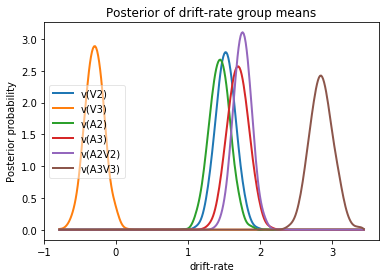

In [19]:
v_V2, v_V3, v_A2, v_A3, v_A2V2, v_A3V3 = m_stim.nodes_db.node[['v(V2)', 'v(V3)', 'v(A2)', 'v(A3)', 'v(A2V2)', 'v(A3V3)']]
hddm.analyze.plot_posterior_nodes([v_V2, v_V3, v_A2, v_A3, v_A2V2, v_A3V3])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')
m_stim.print_stats()

In [18]:
def formatmodeldata(df, conditions, choices):
    dframe = df.copy()
    dframe.columns = ['Subj_id', 'flashpres', 'beeppres', 'response', 'rt']
    dframe['stimName'] = np.select(conditions, choices)
    return(dframe)
    

model_unif = formatmodeldata(unif, [(unif['flashpres'] == 2), (unif['flashpres'] == 3)], ['F2', 'F3'])
model_unib = formatmodeldata(unib, [(unib['beeppres'] == 2), (unib['beeppres'] == 3)], ['B2', 'B3'])
model_congrf = formatmodeldata(congrf, [(congrf['flashpres'] == 2) & (congrf['beeppres'] == 2),
                                        (congrf['flashpres'] == 3) & (congrf['beeppres'] == 3)], ['F2B2', 'F3B3'])
model_congrb = formatmodeldata(congrb, [(congrb['flashpres'] == 2) & (congrb['beeppres'] == 2),
                                        (congrb['flashpres'] == 3) & (congrb['beeppres'] == 3)], ['F2B2', 'F3B3'])

In [47]:
# 0 means responded 2, 1 means responded 3
def stimcode(df, conditions, choices):
    dframe = df.copy()
    dframe['stimCode'] = np.select(conditions, choices)
    return(dframe)

stim_unif = stimcode(model_unif, [(model_unif['flashpres'] == 2) & (model_unif['response'] == 0), 
                                  (model_unif['flashpres'] == 2) & (model_unif['response'] == 1),
                                  (model_unif['flashpres'] == 3) & (model_unif['response'] == 0),
                                  (model_unif['flashpres'] == 3) & (model_unif['response'] == 1)], [1, 0, 0, 1])
stim_congrf = stimcode(model_congrf, [(model_congrf['flashpres'] == 2) & (model_congrf['response'] == 0), 
                                      (model_congrf['flashpres'] == 2) & (model_congrf['response'] == 1),
                                      (model_congrf['flashpres'] == 3) & (model_congrf['response'] == 0),
                                      (model_congrf['flashpres'] == 3) & (model_congrf['response'] == 1)], [1, 0, 0, 1])
stim_unib = stimcode(model_unib, [(model_unib['beeppres'] == 2) & (model_unib['response'] == 0), 
                                  (model_unib['beeppres'] == 2) & (model_unib['response'] == 1),
                                  (model_unib['beeppres'] == 3) & (model_unib['response'] == 0),
                                  (model_unib['beeppres'] == 3) & (model_unib['response'] == 1)], [1, 0, 0, 1])
stim_congrb = stimcode(model_congrb, [(model_congrb['beeppres'] == 2) & (model_congrb['response'] == 0), 
                                      (model_congrb['beeppres'] == 2) & (model_congrb['response'] == 1),
                                      (model_congrb['beeppres'] == 3) & (model_congrb['response'] == 0),
                                      (model_congrb['beeppres'] == 3) & (model_congrb['response'] == 1)], [1, 0, 0, 1])

In [21]:
unif_acc_z = hddm.HDDM(model_unif, include=['a', 'v', 'z', 't'])
#unif_acc_z.find_starting_values()
unif_acc_z.sample(10000, burn=1000)

'''
unif_stim = hddm.HDDM(model_unif, include=['a', 'v', 't'])
unif_stim.find_starting_values()
unif_stim.sample(10000, burn=1000)
'''

 [-----------------100%-----------------] 10000 of 10000 complete in 79.0 sec

"\nunif_stim = hddm.HDDM(model_unif, include=['a', 'v', 't'])\nunif_stim.find_starting_values()\nunif_stim.sample(10000, burn=1000)\n"

In [22]:
unif_acc_z.print_stats()
#unif_stim.print_stats()

       mean         std      2.5q       25q       50q       75q     97.5q       mc err
a    1.4163   0.0495324   1.32287   1.38254   1.41462   1.44885   1.51623  0.000730424
v   1.10363    0.144544  0.822565   1.00635   1.10092   1.20177   1.38807     0.002301
t  0.164208  0.00666549  0.149344   0.16012  0.164797  0.168905  0.175608  9.89336e-05
z  0.375299   0.0244475  0.327337  0.358953  0.375013  0.391557  0.424376  0.000374605
DIC: 213.336196
deviance: 209.416892
pD: 3.919304


In [23]:
congrf_acc_z = hddm.HDDM(model_congrf, include=['a', 'v', 'z', 't'])
#congrf_acc_z.find_starting_values()
congrf_acc_z.sample(10000, burn=1000)

'''
congrf_stim = hddm.HDDM(model_congrf, include=['a', 'v', 't'])
congrf_stim.find_starting_values()
congrf_stim.sample(10000, burn=1000)
'''

 [-----------------100%-----------------] 10000 of 10000 complete in 75.7 sec

"\ncongrf_stim = hddm.HDDM(model_congrf, include=['a', 'v', 't'])\ncongrf_stim.find_starting_values()\ncongrf_stim.sample(10000, burn=1000)\n"

In [24]:
congrf_stim_z.print_stats()
#congrf_stim.print_stats()

        mean         std        2.5q        25q        50q        75q      97.5q       mc err
a    1.29807   0.0484942     1.20576    1.26503    1.29667    1.33038    1.39605  0.000745014
v     1.6334    0.176782     1.28535      1.514    1.63433    1.75288    1.98224   0.00349867
t  0.0186128  0.00438607  0.00947156  0.0156805  0.0188445  0.0217023  0.0265853  7.66994e-05
z   0.460887   0.0288527    0.404875    0.44133   0.460915   0.480355   0.517871  0.000551658
DIC: 21.227512
deviance: 17.549042
pD: 3.678471


In [25]:
unib_acc_z = hddm.HDDM(model_unib, include=['a', 'z', 'v', 't'])
#unib_acc_z.find_starting_values()
unib_acc_z.sample(10000, burn=1000)

'''
unib_stim = hddm.HDDM(model_unib, depends_on={'v': 'stimName'}, include=['a', 'v', 't'])
unib_stim.find_starting_values()
unib_stim.sample(10000, burn=1000)
'''

 [-----------------100%-----------------] 10000 of 10000 complete in 81.1 sec

"\nunib_stim = hddm.HDDM(model_unib, depends_on={'v': 'stimName'}, include=['a', 'v', 't'])\nunib_stim.find_starting_values()\nunib_stim.sample(10000, burn=1000)\n"

In [26]:
unib_acc_z.print_stats()
#unib_stim.print_stats()

       mean        std      2.5q       25q       50q       75q     97.5q       mc err
a   1.75185  0.0911159   1.58627   1.68718   1.74786   1.81062   1.93984   0.00219718
v   2.86666    0.20992   2.45747    2.7246    2.8657   3.00803   3.28845   0.00475711
t  0.146589  0.0106487  0.122897  0.140229  0.147564  0.154186  0.164234  0.000232594
z  0.345779  0.0327307  0.285803  0.322344  0.344917  0.368304   0.41185  0.000671841
DIC: -86.043018
deviance: -89.947734
pD: 3.904716


In [27]:
congrb_acc_z = hddm.HDDM(model_congrb, include=['a', 'z', 'v', 't'])
#congrb_stim_z.find_starting_values()
congrb_acc_z.sample(10000, burn=1000)

'''
congrb_stim = hddm.HDDM(model_congrb, depends_on={'v': 'stimName'}, include=['a', 'v', 't'])
congrb_stim.find_starting_values()
congrb_stim.sample(10000, burn=1000)
'''

 [-----------------100%-----------------] 10000 of 10000 complete in 81.1 sec

"\ncongrb_stim = hddm.HDDM(model_congrb, depends_on={'v': 'stimName'}, include=['a', 'v', 't'])\ncongrb_stim.find_starting_values()\ncongrb_stim.sample(10000, burn=1000)\n"

In [28]:
congrb_acc_z.print_stats()
#congrb_stim.print_stats()

        mean         std       2.5q        25q        50q       75q     97.5q       mc err
a    1.46889   0.0749537    1.33222    1.41696    1.46538   1.51721   1.62732   0.00158866
v    2.18244    0.188957    1.81562    2.05598     2.1804   2.30743   2.55648   0.00401433
t  0.0412116  0.00816972  0.0238757  0.0360424  0.0417156  0.046954   0.05573  0.000192008
z   0.486174   0.0336549   0.419663   0.463673   0.486756  0.508942  0.551499  0.000733429
DIC: -72.506447
deviance: -76.184777
pD: 3.678330


In [40]:
unif_stim = hddm.HDDMStimCoding(stim_unif, include='z', stim_col='stimCode')
unif_stim.sample(10000, burn=1000)

Setting model to be non-informative
Adding z to includes.
 [-----------------100%-----------------] 10000 of 10000 complete in 87.2 sec

In [41]:
unif_stim.print_stats()

       mean         std      2.5q       25q       50q       75q     97.5q       mc err
a   1.43005   0.0507792   1.33351   1.39506   1.42898   1.46391    1.5322  0.000652178
v  0.877904    0.121203  0.642005  0.795878  0.876164  0.959457   1.12018   0.00146467
t  0.163539  0.00656272  0.148925  0.159547  0.164183  0.168251  0.174479  0.000112678
z    0.5969   0.0217686  0.553326  0.582198  0.597009  0.611664  0.639231  0.000287288
DIC: 219.570317
deviance: 215.656006
pD: 3.914311


In [42]:
unib_stim = hddm.HDDMStimCoding(stim_unib, include='z', stim_col='stimCode')
unib_stim.sample(10000, burn=1000)

Setting model to be non-informative
Adding z to includes.
 [-----------------100%-----------------] 10000 of 10000 complete in 86.8 sec

In [43]:
unib_stim.print_stats()

       mean         std      2.5q       25q       50q       75q     97.5q       mc err
a   1.82732    0.100586   1.63969   1.75724   1.82374   1.89294   2.03428     0.002137
v   2.32366    0.162366    2.0034   2.21507   2.32295   2.43146   2.64074   0.00314926
t  0.161453  0.00710036  0.145272  0.157281   0.16214  0.166541  0.173357  0.000120264
z  0.495828   0.0178081  0.461136  0.483764  0.495767  0.507897  0.530267  0.000170915
DIC: -62.989592
deviance: -66.913471
pD: 3.923879


In [44]:
congrf_stim = hddm.HDDMStimCoding(stim_congrf, include='z', stim_col='stimCode')
congrf_stim.sample(10000, burn=1000)

Setting model to be non-informative
Adding z to includes.
 [-----------------100%-----------------] 10000 of 10000 complete in 87.4 sec

In [45]:
congrf_stim.print_stats()

        mean         std       2.5q        25q        50q        75q     97.5q       mc err
a    1.52476   0.0859981    1.36834    1.46478     1.5194     1.5793   1.70901   0.00201939
v     2.1884    0.158712    1.87681    2.08147    2.18628    2.29419    2.5054   0.00275069
t  0.0398548  0.00837738  0.0216484  0.0346591  0.0405351  0.0457928  0.054199  0.000172318
z   0.549337   0.0178109   0.513972   0.537593   0.549844   0.561222  0.584216  0.000195845
DIC: -78.797375
deviance: -82.805805
pD: 4.008430


In [48]:
congrb_stim = hddm.HDDMStimCoding(stim_congrb, include='z', stim_col='stimCode')
congrb_stim.sample(10000, burn=1000)

Setting model to be non-informative
Adding z to includes.
 [-----------------100%-----------------] 10000 of 10000 complete in 87.0 sec

In [49]:
congrb_stim.print_stats()

        mean         std       2.5q        25q        50q        75q      97.5q       mc err
a    1.51786   0.0814799    1.36834    1.46094    1.51446    1.57169    1.68622   0.00186849
v       2.18    0.154001    1.88092    2.07343    2.18068    2.28342    2.48246   0.00240223
t  0.0404534  0.00809732  0.0234085  0.0352504  0.0410498  0.0461518  0.0547001  0.000162205
z   0.549728   0.0180053   0.514844    0.53752   0.549848   0.561684   0.585222  0.000186217
DIC: -79.030405
deviance: -82.944547
pD: 3.914142
